# Assignment #1 - Naïve Bayes - Mushroom ( 0813366 黃柏翔 )

In [31]:
import numpy as np
import pandas as pd



mr_np=np.loadtxt("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", dtype = str, delimiter=',')
mr_attr = ['label','cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root'
          , 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

mr_data = pd.DataFrame(mr_np, columns = mr_attr)

# split into 2 subset(e and p)
mr_e_data = mr_data[( mr_data['label']=='e')]
mr_p_data = mr_data[( mr_data['label']=='p')]


## Feature distribution
warning msg won't influence the result

cap-shape ['b', 'c', 'f', 'k', 's', 'x']
e&p_count [452, 4, 3152, 828, 32, 3656]
  e_count [404, 0, 1596, 228, 32, 1948]
  p_count [48, 4, 1556, 600, 0, 1708]


C:\Users\William\AppData\Local\Temp/ipykernel_17000/2774327832.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\William\AppData\Local\Temp/ipykernel_17000/2774327832.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



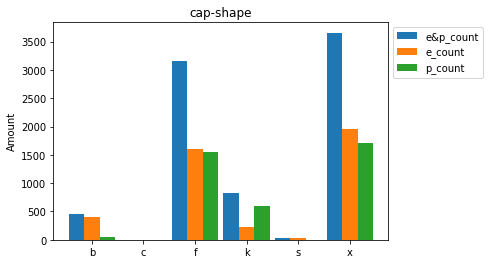

--------------------------------------------------------------------------------
cap-surface ['f', 'g', 's', 'y']
e&p_count [2320, 4, 2556, 3244]
  e_count [1560, 0, 1144, 1504]
  p_count [760, 4, 1412, 1740]


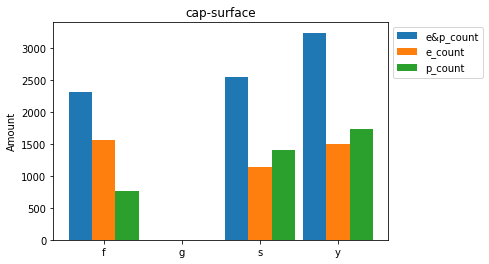

--------------------------------------------------------------------------------
cap-color ['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y']
e&p_count [168, 44, 1500, 1840, 2284, 144, 16, 16, 1040, 1072]
  e_count [48, 32, 624, 1032, 1264, 56, 16, 16, 720, 400]
  p_count [120, 12, 876, 808, 1020, 88, 0, 0, 320, 672]


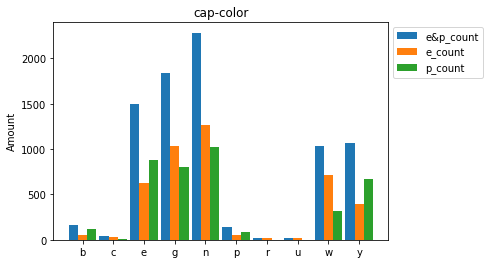

--------------------------------------------------------------------------------
bruises? ['f', 't']
e&p_count [4748, 3376]
  e_count [1456, 2752]
  p_count [3292, 624]


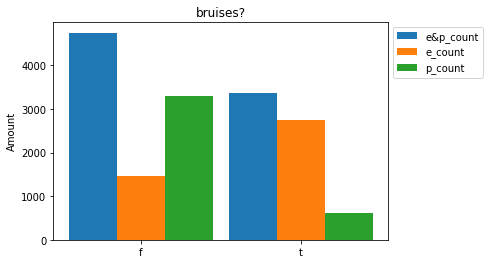

--------------------------------------------------------------------------------
odor ['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y']
e&p_count [400, 192, 2160, 400, 36, 3528, 256, 576, 576]
  e_count [400, 0, 0, 400, 0, 3408, 0, 0, 0]
  p_count [0, 192, 2160, 0, 36, 120, 256, 576, 576]


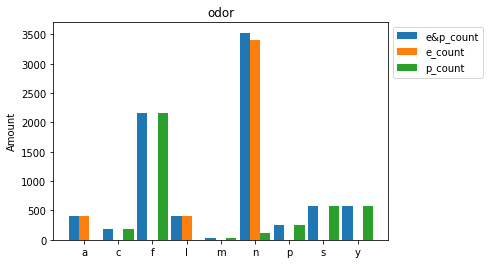

--------------------------------------------------------------------------------
gill-attachment ['a', 'f']
e&p_count [210, 7914]
  e_count [192, 4016]
  p_count [18, 3898]


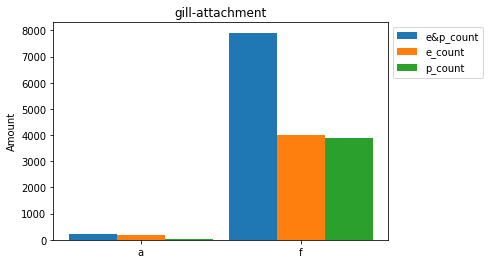

--------------------------------------------------------------------------------
gill-spacing ['c', 'w']
e&p_count [6812, 1312]
  e_count [3008, 1200]
  p_count [3804, 112]


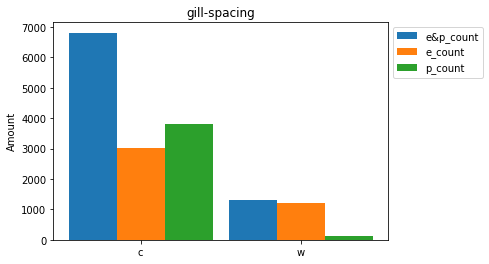

--------------------------------------------------------------------------------
gill-size ['b', 'n']
e&p_count [5612, 2512]
  e_count [3920, 288]
  p_count [1692, 2224]


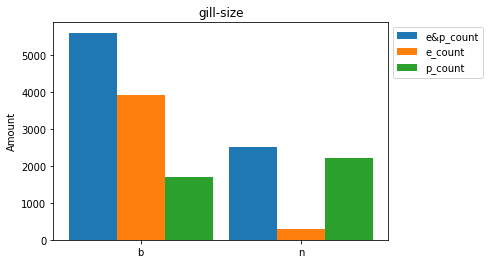

--------------------------------------------------------------------------------
gill-color ['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y']
e&p_count [1728, 96, 752, 732, 408, 1048, 64, 1492, 24, 492, 1202, 86]
  e_count [0, 96, 248, 204, 344, 936, 64, 852, 0, 444, 956, 64]
  p_count [1728, 0, 504, 528, 64, 112, 0, 640, 24, 48, 246, 22]


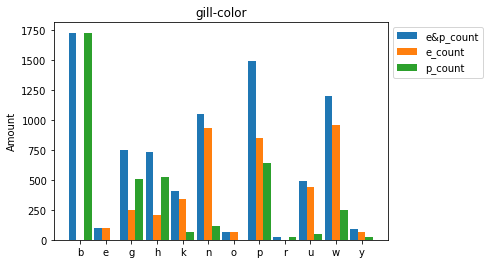

--------------------------------------------------------------------------------
stalk-shape ['e', 't']
e&p_count [3516, 4608]
  e_count [1616, 2592]
  p_count [1900, 2016]


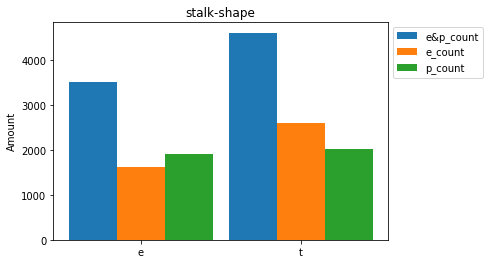

--------------------------------------------------------------------------------
stalk-root ['?', 'b', 'c', 'e', 'r']
e&p_count [2480, 3776, 556, 1120, 192]
  e_count [720, 1920, 512, 864, 192]
  p_count [1760, 1856, 44, 256, 0]


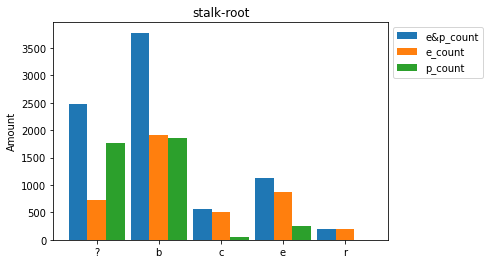

--------------------------------------------------------------------------------
stalk-surface-above-ring ['f', 'k', 's', 'y']
e&p_count [552, 2372, 5176, 24]
  e_count [408, 144, 3640, 16]
  p_count [144, 2228, 1536, 8]


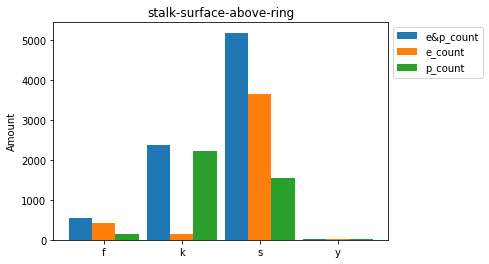

--------------------------------------------------------------------------------
stalk-surface-below-ring ['f', 'k', 's', 'y']
e&p_count [600, 2304, 4936, 284]
  e_count [456, 144, 3400, 208]
  p_count [144, 2160, 1536, 76]


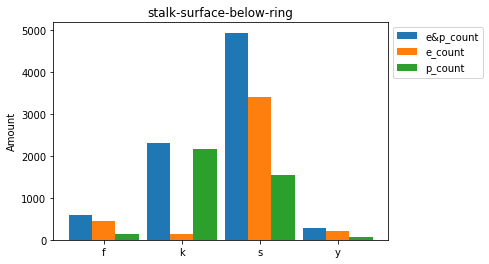

--------------------------------------------------------------------------------
stalk-color-above-ring ['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']
e&p_count [432, 36, 96, 576, 448, 192, 1872, 4464, 8]
  e_count [0, 0, 96, 576, 16, 192, 576, 2752, 0]
  p_count [432, 36, 0, 0, 432, 0, 1296, 1712, 8]


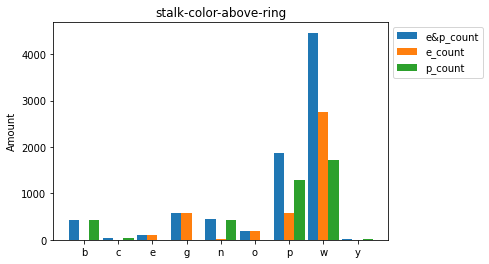

--------------------------------------------------------------------------------
stalk-color-below-ring ['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y']
e&p_count [432, 36, 96, 576, 512, 192, 1872, 4384, 24]
  e_count [0, 0, 96, 576, 64, 192, 576, 2704, 0]
  p_count [432, 36, 0, 0, 448, 0, 1296, 1680, 24]


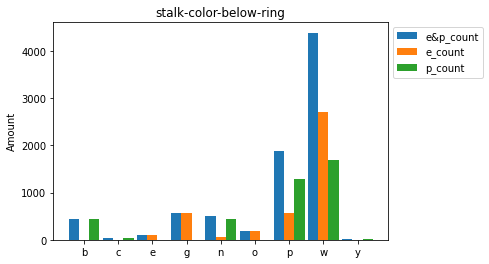

--------------------------------------------------------------------------------
veil-type ['p']
e&p_count [8124]
  e_count [4208]
  p_count [3916]


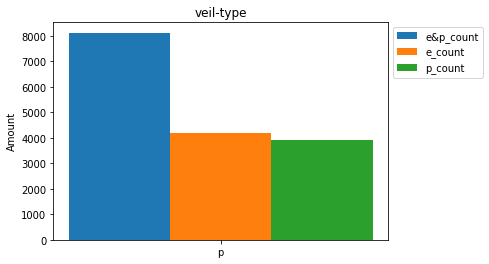

--------------------------------------------------------------------------------
veil-color ['n', 'o', 'w', 'y']
e&p_count [96, 96, 7924, 8]
  e_count [96, 96, 4016, 0]
  p_count [0, 0, 3908, 8]


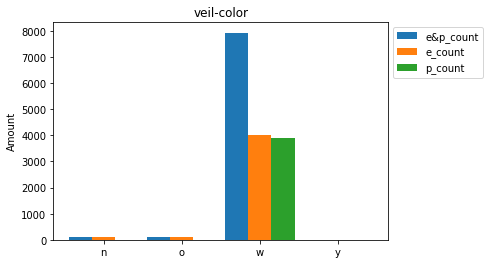

--------------------------------------------------------------------------------
ring-number ['n', 'o', 't']
e&p_count [36, 7488, 600]
  e_count [0, 3680, 528]
  p_count [36, 3808, 72]


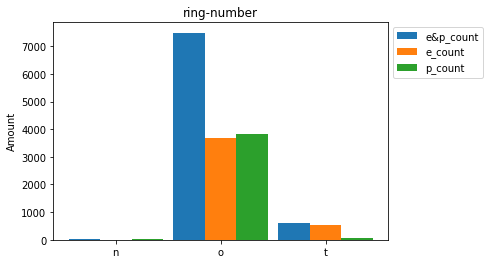

--------------------------------------------------------------------------------
ring-type ['e', 'f', 'l', 'n', 'p']
e&p_count [2776, 48, 1296, 36, 3968]
  e_count [1008, 48, 0, 0, 3152]
  p_count [1768, 0, 1296, 36, 816]


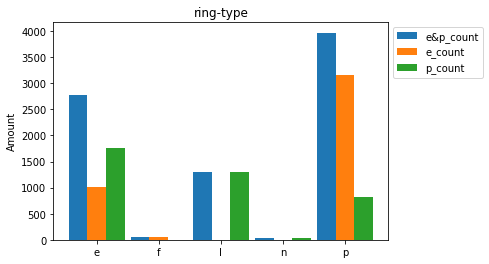

--------------------------------------------------------------------------------
spore-print-color ['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y']
e&p_count [48, 1632, 1872, 1968, 48, 72, 48, 2388, 48]
  e_count [48, 48, 1648, 1744, 48, 0, 48, 576, 48]
  p_count [0, 1584, 224, 224, 0, 72, 0, 1812, 0]


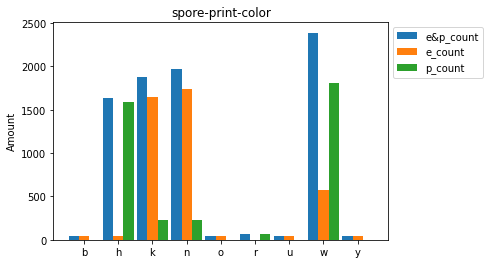

--------------------------------------------------------------------------------
population ['a', 'c', 'n', 's', 'v', 'y']
e&p_count [384, 340, 400, 1248, 4040, 1712]
  e_count [384, 288, 400, 880, 1192, 1064]
  p_count [0, 52, 0, 368, 2848, 648]


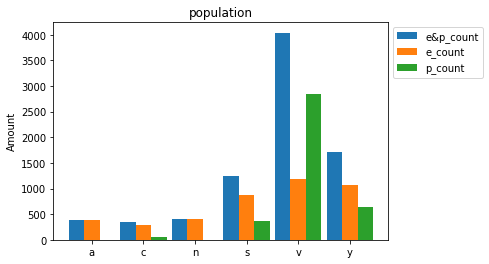

--------------------------------------------------------------------------------
habitat ['d', 'g', 'l', 'm', 'p', 'u', 'w']
e&p_count [3148, 2148, 832, 292, 1144, 368, 192]
  e_count [1880, 1408, 240, 256, 136, 96, 192]
  p_count [1268, 740, 592, 36, 1008, 272, 0]


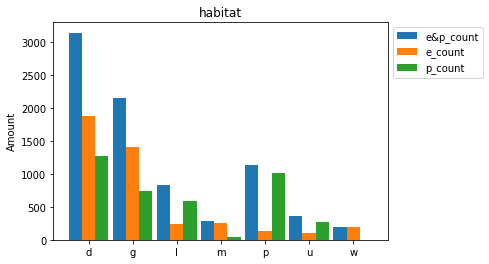

--------------------------------------------------------------------------------


In [34]:
import matplotlib.pyplot as plt

# show data distribution
for feature in mr_attr[1:]:
    fType =  sorted(mr_data[feature].unique())
    ep_count = [len(mr_data[(mr_data[feature]==t)]) for t in fType]
    ecount =  [len(mr_e_data[(mr_data[feature]==t)]) for t in fType]
    pcount =  [len(mr_p_data[(mr_data[feature]==t)]) for t in fType]

    print(feature,fType)
    print('e&p_count',ep_count)
    print('  e_count',ecount)
    print('  p_count',pcount)
    
    x = np.arange(len(fType))
    width = 0.3
    plt.bar(x, ep_count, width ,label='e&p_count')
    plt.bar(x + width, ecount, width, label='e_count')
    plt.bar(x + 2*width, pcount, width, label='p_count')
    plt.xticks(x+width, fType)
    plt.ylabel('Amount')
    plt.title(feature)
    plt.legend(bbox_to_anchor=(1,1), loc='upper left')
    plt.show()
    
    print('-'*80)

用int型態表示類別

In [12]:
from sklearn.preprocessing import LabelEncoder

# encode features
labelencoder = LabelEncoder()
for feature in mr_attr:
    mr_data[feature] = labelencoder.fit_transform(mr_data[feature])

# drop feature 
mr_data = mr_data.drop('stalk-root',axis = 1)
mr_attr.remove('stalk-root')

# Holdout Validation
Confusion matrice are showed here

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#shuffle
mr_data = mr_data.sample(frac=1, random_state=42).reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(mr_data.iloc[:,1:],mr_data.iloc[:,0] , test_size=0.3)

## Without smoothing

In [14]:
# holdout validation without smoothing
model = CategoricalNB(alpha = 1.0e-10)
model.fit(X_train,y_train)
predict = model.predict(X_test)
print('confusion matrix\n',confusion_matrix(y_test,predict,labels = [0,1]))
print(classification_report(y_test,predict,digits = 4))

confusion matrix
 [[1245    3]
 [   2 1188]]
              precision    recall  f1-score   support

           0     0.9984    0.9976    0.9980      1248
           1     0.9975    0.9983    0.9979      1190

    accuracy                         0.9979      2438
   macro avg     0.9979    0.9980    0.9979      2438
weighted avg     0.9979    0.9979    0.9979      2438



## with smoothing

In [15]:
# holdout validation with smoothing
model = CategoricalNB()
model.fit(X_train,y_train)
predict = model.predict(X_test)
print('confusion matrix\n',confusion_matrix(y_test,predict,labels = [0,1]))
print(classification_report(y_test,predict,digits = 4))

confusion matrix
 [[1245    3]
 [ 110 1080]]
              precision    recall  f1-score   support

           0     0.9188    0.9976    0.9566      1248
           1     0.9972    0.9076    0.9503      1190

    accuracy                         0.9537      2438
   macro avg     0.9580    0.9526    0.9534      2438
weighted avg     0.9571    0.9537    0.9535      2438



# K-fold
Confusion matrice are showed here

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


(X, y) = (mr_data.drop('label',axis = 1),mr_data['label'])

kf = KFold(n_splits = 3)

# ensure every feature type contains in trainning set
arr = [len(X[feature].unique()) for feature in mr_data.drop('label',axis = 1)]
np.set_printoptions(suppress=True) 

## without smoothing

In [17]:
# k-fold cross-validation without smoothing
model = CategoricalNB(alpha = 1.0e-10,min_categories = arr)

cm = np.array([[0,0],[0,0]],dtype = int)
scores = []
recall = []
precision = []

for train, test in kf.split(X,y):
    model.fit(X.iloc[train], y[train])
    predict = model.predict(X.iloc[test])
    
    scores.append(model.score(X.iloc[test], y[test]))
    cm+=(confusion_matrix(y[test],predict,labels = [0,1]))
    recall.append(recall_score(y[test],predict))
    precision.append(precision_score(y[test],predict))
    
print('confusion matrix\n',cm/3)
print('Accuracy: %.4f' % (np.mean(scores)))
print('Recall: %.4f' % np.mean(recall))
print('precision: %.4f' % np.mean(precision))

confusion matrix
 [[1396.33333333    6.33333333]
 [   1.         1304.33333333]]
Accuracy: 0.9973
Recall: 0.9992
precision: 0.9952


## with smoothing

In [18]:
# k-fold cross-validation with smoothing
model = CategoricalNB(min_categories = arr)

cm = np.array([[0,0],[0,0]],dtype = int)
scores = []
recall = []
precision = []

for train, test in kf.split(X,y):
    model.fit(X.iloc[train], y[train])
    predict = model.predict(X.iloc[test])
    
    scores.append(model.score(X.iloc[test], y[test]))
    cm+=(confusion_matrix(y[test],predict,labels = [0,1]))
    recall.append(recall_score(y[test],predict))
    precision.append(precision_score(y[test],predict))
    
print('confusion matrix\n',cm/3)
print('Accuracy: %.4f' % (np.mean(scores)))
print('Recall: %.4f' % np.mean(recall))
print('precision: %.4f' % np.mean(precision))

confusion matrix
 [[1396.33333333    6.33333333]
 [ 104.66666667 1200.66666667]]
Accuracy: 0.9590
Recall: 0.9198
precision: 0.9948


# Result
|           |holdout-L|holdout-NL|k-fold-L|k-fold-NL
|-----------|:------:|:------:|:------:|:------:
|Accuracy|0.9561|0.9959|0.9586|0.9972
|Recall|0.9542|0.9960|0.9196|0.9992
|Precision|0.9600|0.9957|0.9941|0.9949

# Comparison & Conclusion

K-fold的表現略勝holdout validation。

在這個資料集中，使用laplace smoothing時，performance較差。
可能是因為訓練時的樣本數不夠大，並不能直接將多加上的alpha忽略，因此會導致結果有偏差。

# Question
<< The warning msg won't influence the result. >>

stalk-color-below-ring ['e', 'g', 'n', 'o', 'p', 'w']
e_count [96, 576, 64, 192, 576, 2704]
4208
[0.022813688212927757, 0.13688212927756654, 0.015209125475285171, 0.045627376425855515, 0.13688212927756654, 0.6425855513307985]
[0.023018509729473186, 0.13692453725676318, 0.015424774560987186, 0.04579971523493118, 0.13692453725676318, 0.6419079259610821]


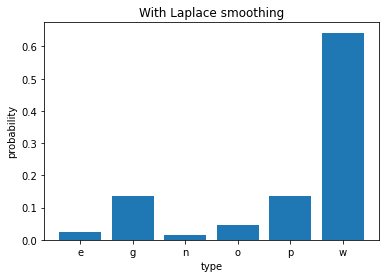

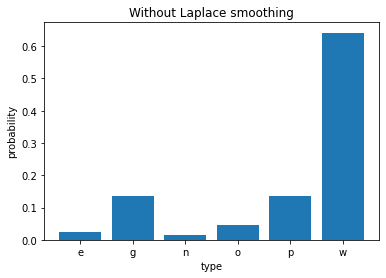

In [30]:
feature = 'stalk-color-below-ring'
fType =  sorted(mr_e_data[feature].unique())

ecount =  [len(mr_e_data[(mr_e_data[feature]==t)]) for t in fType]

# print(feature,fType)
# print('e_count',ecount)
    
p_L = [ Nxy/len(mr_e_data) for Nxy in ecount ]
# print(len(mr_e_data))
# print(p_L)

p_NL = [ (Nxy+1)/(len(mr_e_data)+len(ecount)) for Nxy in ecount ]
# print(p_NL)

import matplotlib.pyplot as plt


x = np.arange(len(fType))
plt.bar(x, p_L)
plt.xticks(x, fType)
plt.xlabel('type')
plt.ylabel('probability')
plt.title('With Laplace smoothing')
plt.show()

plt.bar(x, p_NL)
plt.xticks(x, fType)
plt.xlabel('type')
plt.ylabel('probability')
plt.title('Without Laplace smoothing')
plt.show()